# Project: Investigate a Dataset - [TMDB-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including (id, imdb_id, popularity, budget. revenue. original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj).

As for (id), it is a unique code assigned by TMDB to each movie, and imdb_id is the counterpart from IMDB.

Popularity is measured for movies based on:

    Number of votes for the day
    Number of views for the day
    Number of users who marked it as a "favourite" for the day
    Number of users who added it to their "watchlist" for the day
    Release date
    Number of total votes
    Previous days score
    
Budget and revenue are self explanatory and they are the actual figures spent/collected when the movie was being produced/released. meanwhile, budget_adj and revenue_adj show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

Tagline is a short description or comment on a movie that is displayed on movie posters (or direct to video covers, etc.) to capture the essence of the movie, and ultimately make you watch the movie.

Keywords are used to refine search results and are derived from the frequent keywords used by users to search for a movie.

Some of the columns are insignificant and will be dropped at the cleaning stage.

### Question(s) for Analysis
1. What is the mean runtime?
2. How has runtime developed over the years?
3. How is popularity correlated with runtime

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [3]:
# Loading our database and printing out a few lines. inspecting data
#   types and looking for instances of missing or possibly errant data.
tmdb_df = pd.read_csv('tmdb-movies.csv')
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> Clearly there is some columns containing null values. most of these columns are insignificant to the analysis, like homepage and overview, we will drop these columns later.

In [4]:
# We need to determine the number of rows and columns
tmdb_df.shape

(10866, 21)

In [5]:
# Here we will view the first 5 rown limiting number iof columns to 12 because columns at the middle aren't necessary.
pd.set_option('display.max_columns',12)
tmdb_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,...,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning
 

In [6]:
# Here we will drop insignificant columns and save the new dataframe.
tmdb_df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'revenue_adj', 'budget_adj', 'release_date', 'overview', 'keywords'], axis = 1, inplace = True)
tmdb_df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [7]:
# lets check the number of columns we have now after dropping insignificant data
tmdb_df.shape

(10866, 11)

In [8]:
# Here we check if there is any null values to be amended
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 933.9+ KB


In [9]:
# Filling empty cells with data that we can exclude later while plotting
tmdb_df['director'].fillna('none', inplace =  True)
tmdb_df['genres'].fillna('none', inplace = True)
tmdb_df['production_companies'].fillna('none', inplace = True)

In [10]:
# Check if there is null cells we missed
tmdb_df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [11]:
#checking type of 'runtime' to see if we need to convert it into seconds so we can use it later.
tmdb_df['runtime']

0        124
1        120
2        119
3        136
4        137
        ... 
10861     95
10862    176
10863     94
10864     80
10865     74
Name: runtime, Length: 10866, dtype: int64

In [12]:
# Looking for any duplicated rows
tmdb_df.duplicated().sum()

1

In [13]:
# Removing the duplicate row so it doesn't affect the mean calculated.
tmdb_df.drop_duplicates(inplace = True)

In [14]:
# Rechecking the data after the above changes
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
director                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1018.6+ KB


In [15]:
# Checking data statistics
tmdb_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


Looking at minimum value for budget, revenue and runtime we can tell that there is something wrong here, they can't be zero, and that's affecting the quantiles calculated. we have to drop these rows with zero values.

In [16]:
# Removing zero values
no_zero_values = tmdb_df.query('budget == 0 or revenue == 0 or runtime == 0').index
tmdb_df.drop(no_zero_values, axis=0, inplace=True)

Now let's check the data description again and it should make sense rhis time.

In [17]:
tmdb_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


Now that looks better, the least profitable movie made 2 million dollars on a 1 million dollar budget.

In [18]:
min_budget = tmdb_df.loc[tmdb_df['budget'] == 1]
min_budget

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year
2618,0.090186,1,100,Lost & Found,Jeff Pollack,95,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,14,4.8,1999
3581,0.520430,1,1378,"Love, Wedding, Marriage",Dermot Mulroney,90,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,55,5.3,2011


Checking the budget for Love, Wedding, Marriage on Google i found that it is 13 mil but this is as far as one can go, otherwise we have to pull this data through TMDB's API again.

Started the data cleaning process by dropping less important columns to the analysis process, total of 10 columns gor dropped, made sure that now we have 11 columns only. checking the info i noticed there is null cells which i filled by string (none) so we can drop it later if needed. dropped duplicates as well. made sure that column (runtime) is in seconds format so it is ready for analysis. with more investigation i found out that some values don't make any sense, some cells in budget and revenue had values of zero since they are rounded to millions and this affected the minimum statistics of the dataframe, hence it would've affected our mean calculations, i decided to drop it as well, although it brough thr number of movies down too 3854 from 10865, but that's so we can have the most accurate results. found a mistake that's quite tough to fix.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the mean runtime?)

In [19]:
# Calculating the mean runtime for the movies included in the database
mean_runtime = tmdb_df['runtime'].mean().round(decimals = 2)
print (mean_runtime, 'seconds')

109.22 seconds


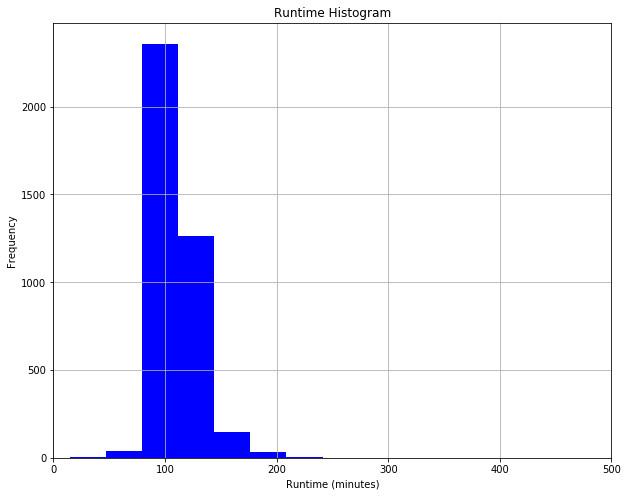

In [20]:
# Plotting a histogram of runtime column
x = np.arange(0, 500, 25)
plt.xlim([0, 500])
plt.legend()
plt.xlabel('Runtime (minutes)')
plt.title('Runtime Histogram')
tmdb_df['runtime'].plot(kind='hist', figsize= (10,8), grid = True, facecolor = 'b')
plt.show()

In [21]:
average = pd.Series(range(1,180))
average_frequency = tmdb_df['runtime'].isin(average).sum()
percentage = (average_frequency/3854).round(decimals = 2)
print (average_frequency, 'movies or like' , percentage, 'of the movies are below 180 minutes')

3820 movies or like 0.99 of the movies are below 180 minutes


In [22]:
average = pd.Series(range(90,180))
ndaverage_frequency = tmdb_df['runtime'].isin(average).sum()
percentage = (ndaverage_frequency/3854).round(decimals = 2)
print (ndaverage_frequency, 'movies or like' , percentage, 'of the movies are between 90 and 180 minutes')

3399 movies or like 0.88 of the movies are between 90 and 180 minutes


### Research Question 2  (How has runtime developed over the years?)

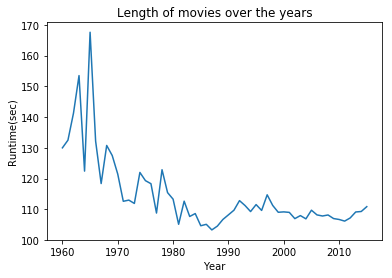

In [23]:
# Checking if there is some sort of trend in between runtime and release year
runtime_year = tmdb_df.groupby('release_year')['runtime'].mean()
plt.plot(runtime_year)
plt.title('Length of movies over the years')
plt.xlabel('Year')
plt.ylabel('Runtime(sec)')
plt.show()

There has been a downtrend in runtime over the years.

In [24]:
tmdb_df.runtime.describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

Looking at the 75th percentiles tells us that this downtrend observation makes sense.

### Research Question 3  (How is popularity correlated with runtime?)

In [25]:
# We will investigate the correlation between popularity and runtime.
tmdb_df['popularity'].corr(tmdb_df['runtime']).round(decimals = 2)

0.22

In [26]:
# Find max value in popularity
max_popularity = tmdb_df['popularity'].max()
# Find max value in runtime 
max_runtime = tmdb_df['runtime'].max()
max_runtime, max_popularity

(338, 32.985763)

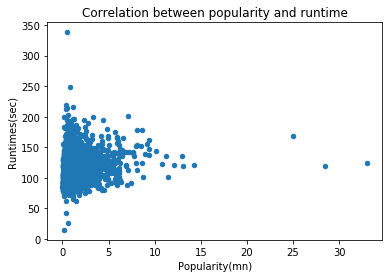

In [30]:
# plotting popularity against runtime to visualize how they correlate with each other

tmdb_df.plot(x= 'popularity', y= 'runtime', kind = 'scatter')
plt.legend()
plt.xlabel('Popularity(mn)')
plt.ylabel('Runtimes(sec)')
plt.title('Correlation between popularity and runtime')
plt.show()

In [28]:
# checking that the outlier (single value to the right) is correct
tmdb_df.loc[tmdb_df['popularity'] == max_popularity]

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015


In [29]:
# checking that the outlier (single value at the top) is correct
tmdb_df.loc[tmdb_df['runtime'] == max_runtime]

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year
2107,0.534192,18000000,871279,Carlos,Olivier Assayas,338,Crime|Drama|Thriller|History,Egoli Tossell Film AG|Canal+|Arte France|Films...,35,6.2,2010


<a id='conclusions'></a>
## Conclusions

> Mean runtime is 109.22 seconds and 99% of the movies are below 3 hours, but 88% of the movies are between hour and a half and three hours.

> Runtime deciined over the years but we can't tell why exactly due to not having enough information.

> Correlation between popularity and runtime is so insignificnt, meaning that it is not necessarily true that a short movie is more popular than a longer one. actually the longest movie in the database is the least popular.
We can see that most movies are below 300 mins and have a value less than 15 on the popularity ranking.

## Limitations
> While cleaning the data we gor rid of roughly two thirds the data because most had zero values, also we discovered a mistake by chance which makes it possible that there are other mistakes which we are unaware of as well.

>Based on how popularity is calculated it will be more accurate if we have more details about each metric and how it relates to runtime.


In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0